In [1]:
import gensim

In [2]:
import numpy
import os
import re
import binascii
from time import time
import json
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
document = []
fname_ = []
for root,_,files in os.walk("abstracts"):
    for fname in files:
            if fname[-4:] == ".txt":
                fnames = os.path.join(root, fname)
                fname_.append(fnames)
for fn in fname_:                
    with open(fn,  "rt", encoding="utf-8") as f:
        try:
            for line in f:
                if "Abstract    :" in line:
                    break
                # get abstract as a single string
        #                             documents = [line.strip() for line in f.readlines()]
#                 print(line)
                documents = ' '.join([line[:-1].strip() for line in f])
                documents = re.sub(' +', ' ', documents)  # remove double spaces
                document.append(documents)
        except:
            continue

In [4]:
document[100]

'Type : Award NSF Org : OCE Latest Amendment Date : July 19, 1991 File : a9000333 Award Number: 9000333 Award Instr.: Standard Grant Prgm Manager: Bilal U. Haq OCE DIVISION OF OCEAN SCIENCES GEO DIRECTORATE FOR GEOSCIENCES Start Date : March 1, 1990 Expires : February 29, 1992 (Estimated) Expected Total Amt. : $37522 (Estimated) Investigator: James S. McClain Mcclain@geology.ucdavis.edu (Principal Investigator current) Sponsor : U of Cal Davis OVCR/Sponsored Programs Davis, CA 956168671 530/752-2075 NSF Program : 1620 MARINE GEOLOGY AND GEOPHYSICS Fld Applictn: 0204000 Oceanography 42 Geological Sciences Program Ref : 1577, Abstract : In the summer of 1988 the principal investigator measured microseismicity in and near the hydrothermal vent field of the Endeavor segment of the Juan de Fuca Ridge. A very surprising result was the large number (hundreds) of seismic events that were observed. The principal investigator thinks he has made the first observation of long duration tremor assoc

#### for Set up (min_df = 2,use_idf = True,sublinear_tf = True,max_df =1.0,max_features = 20000)

In [6]:
#calculate term-document matrix with tf-idf scores
tfidf_vectorizer_7 = TfidfVectorizer(min_df = 2,use_idf = True,sublinear_tf = True,max_df =1.0,max_features = 20000)
tfidf_matrix_7 = tfidf_vectorizer_7.fit_transform(document)

In [7]:
# Inspect terms in vocabulary
print(tfidf_vectorizer_7.get_feature_names()[:5120])
print(tfidf_vectorizer_7.get_feature_names()[-10:])

['00', '000', '0000', '00000', '0000099', '0000912', '001', '00709', '01', '0100', '0100000', '01002', '010033285', '0101000', '0102', '0102000', '0103000', '0104000', '0105000', '0106000', '0107000', '01075', '0108000', '0109000', '0110000', '0111', '0111000', '0112000', '0113000', '0114000', '0116000', '0118000', '0120000', '0123', '01267', '0150', '016092247', '016101400', '018543602', '02', '0201000', '0202000', '0203000', '0204000', '0205000', '0206000', '0207000', '0208000', '0211', '02114', '021155096', '021182394', '02125', '02138', '021383826', '021385317', '021394307', '02140', '02155', '024549110', '024581060', '0246', '024673800', '02481', '02543', '025431015', '02747', '02881', '028920984', '02912', '03', '0300000', '0302000', '0304000', '0304010', '0304020', '0306000', '0308000', '0309000', '0311', '0311000', '0312000', '0313000', '0313010', '0313040', '0315000', '0316000', '0317000', '0319000', '0320', '037551404', '03824', '0400000', '04011', '0411', '0430', '044695717'

In [108]:
features = tfidf_vectorizer_7.get_feature_names()

In [109]:
## Inspect document frequencies (counts) of terms

from collections import Counter
terms_in_docs = tfidf_vectorizer_7.inverse_transform(tfidf_matrix_7)
token_counter = Counter()
for terms in terms_in_docs:
    token_counter.update(terms)

for term, count in token_counter.most_common(20):
    print("%d\t%s" % (count, term))

132041	abstract
132041	applictn
132041	fld
132041	program
132041	sponsor
132041	investigator
132041	amt
132041	total
132041	expected
132041	expires
132041	start
132041	manager
132041	prgm
132041	instr
132041	number
132041	file
132041	date
132041	amendment
132041	latest
132041	org


#### For set up (min_df = .3,use_idf = True,sublinear_tf = True,max_df =1.0,max_features = 20000)

In [102]:
#calculate term-document matrix with tf-idf scores
tfidf_vectorizer_6 = TfidfVectorizer(min_df = .3,use_idf = True,sublinear_tf = True,max_df =1.0,max_features = 20000)
tfidf_matrix_6 = tfidf_vectorizer_6.fit_transform(document)

In [103]:
# Inspect terms in vocabulary
print(tfidf_vectorizer_6.get_feature_names()[:5120])
print(tfidf_vectorizer_6.get_feature_names()[-10:])

['0000', '0000099', '15', '30', '31', 'abstract', 'amendment', 'amt', 'an', 'and', 'applications', 'applictn', 'are', 'as', 'at', 'august', 'award', 'be', 'by', 'co', 'continuing', 'current', 'date', 'direct', 'div', 'division', 'edu', 'estimated', 'expected', 'expires', 'file', 'fld', 'for', 'from', 'grant', 'has', 'have', 'in', 'instr', 'investigator', 'is', 'it', 'july', 'latest', 'manager', 'may', 'nec', 'new', 'nsf', 'number', 'of', 'on', 'or', 'org', 'other', 'othr', 'prgm', 'principal', 'program', 'project', 'ref', 'research', 'science', 'sciences', 'sponsor', 'standard', 'start', 'study', 'that', 'the', 'their', 'these', 'this', 'to', 'total', 'type', 'university', 'which', 'will', 'with']
['their', 'these', 'this', 'to', 'total', 'type', 'university', 'which', 'will', 'with']


In [104]:
features = tfidf_vectorizer_6.get_feature_names()

In [105]:
## Inspect document frequencies (counts) of terms

from collections import Counter
terms_in_docs = tfidf_vectorizer_6.inverse_transform(tfidf_matrix_6)
token_counter = Counter()
for terms in terms_in_docs:
    token_counter.update(terms)

for term, count in token_counter.most_common(20):
    print("%d\t%s" % (count, term))

132041	abstract
132041	applictn
132041	fld
132041	program
132041	sponsor
132041	investigator
132041	amt
132041	total
132041	expected
132041	expires
132041	start
132041	manager
132041	prgm
132041	instr
132041	number
132041	file
132041	date
132041	amendment
132041	latest
132041	org


#### For set up (min_df = .3,use_idf = True,sublinear_tf = True,max_df =0.8,max_features = 20000)

In [97]:
#calculate term-document matrix with tf-idf scores
tfidf_vectorizer_5 = TfidfVectorizer(min_df = .3,use_idf = True,sublinear_tf = True,max_df =0.8,max_features = 20000)
tfidf_matrix_5= tfidf_vectorizer_5.fit_transform(document)

In [98]:
# Inspect terms in vocabulary
print(tfidf_vectorizer_5.get_feature_names()[:5120])
print(tfidf_vectorizer_5.get_feature_names()[-10:])

['0000', '0000099', '15', '30', '31', 'an', 'applications', 'are', 'as', 'at', 'august', 'be', 'by', 'co', 'continuing', 'direct', 'div', 'division', 'edu', 'from', 'has', 'have', 'is', 'it', 'july', 'may', 'nec', 'new', 'on', 'or', 'other', 'othr', 'project', 'research', 'science', 'sciences', 'standard', 'study', 'that', 'their', 'these', 'university', 'which', 'will', 'with']
['sciences', 'standard', 'study', 'that', 'their', 'these', 'university', 'which', 'will', 'with']


In [99]:
features = tfidf_vectorizer_5.get_feature_names()

In [100]:
## Inspect document frequencies (counts) of terms

from collections import Counter
terms_in_docs = tfidf_vectorizer_5.inverse_transform(tfidf_matrix_5)
token_counter = Counter()
for terms in terms_in_docs:
    token_counter.update(terms)

for term, count in token_counter.most_common(20):
    print("%d\t%s" % (count, term))

104541	will
103120	is
93797	be
92379	direct
88634	on
86147	research
85032	with
84619	edu
83008	31
80661	other
79187	standard
78064	are
76765	by
76560	that
72314	as
71128	applications
69766	division
67087	university
66869	sciences
66028	from


#### For set up (min_df = .3,use_idf = True,sublinear_tf = True,max_df =0.7,max_features = 20000)

In [93]:
#calculate term-document matrix with tf-idf scores
tfidf_vectorizer_4 = TfidfVectorizer(min_df = .3,use_idf = True,sublinear_tf = True,max_df =0.7,max_features = 20000)
tfidf_matrix_4 = tfidf_vectorizer_4.fit_transform(document)

In [94]:
# Inspect terms in vocabulary
print(tfidf_vectorizer_4.get_feature_names()[:5120])
print(tfidf_vectorizer_4.get_feature_names()[-10:])

['0000', '0000099', '15', '30', '31', 'an', 'applications', 'are', 'as', 'at', 'august', 'by', 'co', 'continuing', 'direct', 'div', 'division', 'edu', 'from', 'has', 'have', 'it', 'july', 'may', 'nec', 'new', 'on', 'or', 'other', 'othr', 'project', 'research', 'science', 'sciences', 'standard', 'study', 'that', 'their', 'these', 'university', 'which', 'with']
['science', 'sciences', 'standard', 'study', 'that', 'their', 'these', 'university', 'which', 'with']


In [95]:
features = tfidf_vectorizer_4.get_feature_names()

In [96]:
## Inspect document frequencies (counts) of terms

from collections import Counter
terms_in_docs = tfidf_vectorizer_4.inverse_transform(tfidf_matrix_4)
token_counter = Counter()
for terms in terms_in_docs:
    token_counter.update(terms)

for term, count in token_counter.most_common(20):
    print("%d\t%s" % (count, term))

92379	direct
88634	on
86147	research
85032	with
84619	edu
83008	31
80661	other
79187	standard
78064	are
76765	by
76560	that
72314	as
71128	applications
69766	division
67087	university
66869	sciences
66028	from
65961	an
65876	nec
60811	at


#### Fror set up (min_df = .3,use_idf = True,sublinear_tf = True,max_df =0.6,max_features = 20000)

In [88]:
#calculate term-document matrix with tf-idf scores
tfidf_vectorizer_3 = TfidfVectorizer(min_df = .3,use_idf = True,sublinear_tf = True,max_df =0.6,max_features = 20000)
tfidf_matrix_3 = tfidf_vectorizer_3.fit_transform(document)

In [89]:
# Inspect terms in vocabulary
print(tfidf_vectorizer_3.get_feature_names()[:5120])
print(tfidf_vectorizer_3.get_feature_names()[-10:])

['0000', '0000099', '15', '30', 'an', 'applications', 'are', 'as', 'at', 'august', 'by', 'co', 'continuing', 'div', 'division', 'from', 'has', 'have', 'it', 'july', 'may', 'nec', 'new', 'or', 'othr', 'project', 'science', 'sciences', 'standard', 'study', 'that', 'their', 'these', 'university', 'which']
['project', 'science', 'sciences', 'standard', 'study', 'that', 'their', 'these', 'university', 'which']


In [90]:
features = tfidf_vectorizer_3.get_feature_names()

In [92]:
## Inspect document frequencies (counts) of terms

from collections import Counter
terms_in_docs = tfidf_vectorizer_3.inverse_transform(tfidf_matrix_3)
token_counter = Counter()
for terms in terms_in_docs:
    token_counter.update(terms)

for term, count in token_counter.most_common(20):
    print("%d\t%s" % (count, term))

79187	standard
78064	are
76765	by
76560	that
72314	as
71128	applications
69766	division
67087	university
66869	sciences
66028	from
65961	an
65876	nec
60811	at
60104	these
60043	0000099
59888	project
54503	which
49021	continuing
47877	div
47127	15


#### For set up  (min_df = .3,stop_words='english', use_idf = True,sublinear_tf = True,max_df =0.8,max_features = 20000

In [207]:
#calculate term-document matrix with tf-idf scores
tfidf_vectorizer_2 = TfidfVectorizer(min_df = .3,stop_words='english', use_idf = True,sublinear_tf = True,max_df =0.8,max_features = 20000)
tfidf_matrix_2 = tfidf_vectorizer_2.fit_transform(document)

In [208]:
# Inspect terms in vocabulary
print(tfidf_vectorizer_2.get_feature_names()[:5120])
print(tfidf_vectorizer_2.get_feature_names()[-10:])

['0000', '0000099', '15', '30', '31', 'applications', 'august', 'continuing', 'direct', 'div', 'division', 'edu', 'july', 'nec', 'new', 'othr', 'project', 'research', 'science', 'sciences', 'standard', 'study', 'university']
['nec', 'new', 'othr', 'project', 'research', 'science', 'sciences', 'standard', 'study', 'university']


In [209]:
features = tfidf_vectorizer_2.get_feature_names()

In [210]:
## Inspect document frequencies (counts) of terms

from collections import Counter
terms_in_docs = tfidf_vectorizer_2.inverse_transform(tfidf_matrix_2)
token_counter = Counter()
for terms in terms_in_docs:
    token_counter.update(terms)

for term, count in token_counter.most_common(20):
    print("%d\t%s" % (count, term))

92379	direct
86147	research
84619	edu
83008	31
79187	standard
71128	applications
69766	division
67087	university
66869	sciences
65876	nec
60043	0000099
59888	project
49021	continuing
47877	div
47127	15
46999	new
46152	august
44722	30
43074	july
42173	science


#### for set up : (min_df = .3,stop_words='english', use_idf = True,sublinear_tf = True,max_df =1,max_features = 20000)

In [5]:
#calculate term-document matrix with tf-idf scores
tfidf_vectorizer_1 = TfidfVectorizer(min_df = .3,stop_words='english', use_idf = True,sublinear_tf = True,max_df = 1.0,max_features = 20000)
tfidf_matrix = tfidf_vectorizer_1.fit_transform(document)

In [6]:
tfidf_matrix

<132041x51 sparse matrix of type '<class 'numpy.float64'>'
	with 5066173 stored elements in Compressed Sparse Row format>

In [7]:
# Inspect terms in vocabulary
print(tfidf_vectorizer_1.get_feature_names()[:10])
print(tfidf_vectorizer_1.get_feature_names()[-10:])

['0000', '0000099', '15', '30', '31', 'abstract', 'amendment', 'amt', 'applications', 'applictn']
['research', 'science', 'sciences', 'sponsor', 'standard', 'start', 'study', 'total', 'type', 'university']


In [8]:
features = tfidf_vectorizer_1.get_feature_names()

In [9]:
## Inspect document frequencies (counts) of terms

from collections import Counter
terms_in_docs = tfidf_vectorizer_1.inverse_transform(tfidf_matrix)
token_counter = Counter()
for terms in terms_in_docs:
    token_counter.update(terms)

for term, count in token_counter.most_common(20):
    print("%d\t%s" % (count, term))

132041	abstract
132041	applictn
132041	fld
132041	program
132041	sponsor
132041	investigator
132041	amt
132041	total
132041	expected
132041	expires
132041	start
132041	manager
132041	prgm
132041	instr
132041	number
132041	file
132041	date
132041	amendment
132041	latest
132041	org


### form the above results for the features it can be seen that the best set up among the proposed one is  the last set up or (min_df = .3,stop_words='english', use_idf = True,sublinear_tf = True,max_df =1,max_features = 20000)). When the min_df is chosen to be 0 or very low many of the feautres are just numbres so with applying the restriction of the 0.3 for the min_df many of the features which are not meaningful looks to be removed. Also with removing the stop words many mainly un importatnt features such as 'an' , 'and' ,...... also get removed. 

In [ ]:
### With the last set up we do the clustering

In [121]:
# We use a subset of the documents in clustering for faster calculation and easier interpretation of results
matrix_sample = tfidf_matrix[:1000]

In [168]:

from sklearn.cluster import KMeans

# Do clustering
km = KMeans(n_clusters=30, random_state=123, verbose=0)
km.fit(matrix_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [169]:
import heapq, numpy as np

# Custom function to print top keywords for each cluster
def print_clusters(matrix, clusters, n_keywords=10):
    for cluster in range(min(clusters), max(clusters)+1):
        cluster_docs = [i for i, c in enumerate(clusters) if c == cluster]
        print("Cluster: %d (%d docs)" % (cluster, len(cluster_docs)))
        
        # Keep scores for top n terms
        new_matrix = np.zeros((len(cluster_docs), matrix.shape[1]))
        for cluster_i, doc_vec in enumerate(matrix[cluster_docs].toarray()):
            for idx, score in heapq.nlargest(n_keywords, enumerate(doc_vec), key=lambda x:x[1]):
                new_matrix[cluster_i][idx] = score

        # Aggregate scores for kept top terms
        keywords = heapq.nlargest(n_keywords, zip(new_matrix.sum(axis=0), features))
        print(', '.join([w for s,w in keywords]))
        print()

In [170]:
km.labels_

array([ 7, 29, 23, 14, 21,  0,  9, 24, 28, 16, 12,  4, 23,  6,  9, 18, 16,
       29, 18, 12, 29, 25, 11, 21, 22, 12, 20, 20, 14, 18,  1,  9,  7, 13,
       18, 12, 22,  4,  4, 12, 12, 28, 12, 26, 18, 18, 12,  9, 18, 12, 21,
       15, 12, 21,  9,  4, 12, 27, 16, 13,  1, 27,  9, 21, 16, 12, 12, 12,
        6, 17, 11,  9,  2,  5, 16, 24, 15, 20, 18, 20, 22, 14, 12, 22, 14,
       21, 16, 16, 26, 25, 13, 21, 29, 14,  9, 18,  4, 16, 16, 15, 16, 13,
        5, 25, 14,  8,  6, 29, 10, 15,  7, 21, 17, 17, 13,  1, 15, 15, 17,
       19,  8, 29, 12, 15, 21,  5, 28, 17,  6, 13, 24, 25, 18, 18, 13, 19,
       13, 22,  7, 19, 18,  3, 16, 16,  9, 11, 16, 12, 12, 18, 12, 21, 12,
       21, 11, 28, 12,  5, 22, 11, 25, 13,  9, 20, 23, 28, 21, 11, 18, 26,
       24,  7, 14,  9, 18,  1, 23, 29,  6, 13,  7, 15, 14,  3, 19, 22, 14,
       13, 27,  3, 27,  2, 14, 17, 25, 12, 23,  4, 14,  8, 14, 20, 25,  7,
        1,  8, 22,  0, 22, 28, 16,  2,  2, 12, 18,  5, 29, 14, 23,  4, 20,
        5, 13,  5, 22,  5

In [171]:
print_clusters(matrix_sample, km.labels_)

Cluster: 0 (20 docs)
new, study, award, research, 30, science, 0000099, program, investigator, nec

Cluster: 1 (37 docs)
award, 0000099, investigator, nec, 15, estimated, date, program, research, project

Cluster: 2 (32 docs)
research, award, science, program, 30, div, investigator, 0000099, 15, nec

Cluster: 3 (21 docs)
august, award, investigator, estimated, date, 15, nsf, sciences, program, study

Cluster: 4 (45 docs)
award, continuing, 0000099, investigator, nec, estimated, study, project, date, principal

Cluster: 5 (45 docs)
research, award, program, investigator, nsf, estimated, date, university, project, current

Cluster: 6 (46 docs)
science, award, 0000099, nec, investigator, program, university, research, project, estimated

Cluster: 7 (41 docs)
study, award, 30, continuing, 0000099, investigator, nec, july, estimated, principal

Cluster: 8 (42 docs)
research, university, award, 0000099, investigator, continuing, nec, estimated, date, program

Cluster: 9 (29 docs)
science, re

In [234]:
first_clusters = {'Cluster0':['(20 docs)', 'new', 'study', 'award', 'research', '30', 'science', '0000099', 'program', 'investigator', 'nec'],
                                 "Cluster1": ['(37 docs)','award', '0000099', 'investigator', 'nec', '15', 'estimated', 'date', 'program', 'research', 'project'],
                                 'Cluster2': ['(32 docs)','research', 'award', 'science', 'program', '30', 'diCluster2v', 'investigator', '0000099', '15', 'nec'],
                                 'Cluster3':['(21 docs)','august', 'award', 'investigator', 'estimated', 'date', '15', 'nsf', 'sciences', 'program', 'study'],
                    'Cluster4':['(45 docs)','award', 'continuing', '0000099', 'investigator', 'nec', 'estimated', 'study', 'project', 'date', 'principal'],
                    'Cluster5':['(45 docs)','research', 'award', 'program', 'investigator', 'nsf', 'estimated', 'date', 'university', 'project', 'current'],
                    'Cluster6':['(46 docs)','science', 'award', '0000099', 'nec', 'investigator', 'program', 'university', 'research', 'project', 'estimated'],
                    'Cluster7' :['(41 docs)', 'study', 'award', '30', 'continuing', '0000099', 'investigator', 'nec', 'july', 'estimated', 'principal'],
                    'Cluster8 ': ['(42 docs)', 'research', 'university', 'award', '0000099', 'investigator', 'continuing', 'nec', 'estimated', 'date', 'program'],
                    'Cluster9': ['(29 docs)', 'science', 'research', 'award', '30', 'university', 'estimated', 'investigator', 'date', 'nsf', 'program'],
                    'Cluster10': ['(23 docs)','august', 'award', 'july', 'investigator', 'estimated', 'science', 'date', 'program', '0000099', 'nec']}

In [238]:
import pandas as pd
frame = pd.DataFrame.from_dict(first_clusters, orient='index')
frame['label'] = ['new study award', 'research program date', ' science program', ' research program-Augest-date',
                  'continuing study', ' current project', 'university project', ' principal', ' research-university ', 
                 'science award', 'program data']
frame

,0,1,2,3,4,5,6,7,8,9,10,label
Cluster0,(20 docs),new,study,award,research,30,science,0000099,program,investigator,nec,new study award
Cluster1,(37 docs),award,0000099,investigator,nec,15,estimated,date,program,research,project,research program date
Cluster2,(32 docs),research,award,science,program,30,diCluster2v,investigator,0000099,15,nec,science program
Cluster3,(21 docs),august,award,investigator,estimated,date,15,nsf,sciences,program,study,research program-Augest-date
Cluster4,(45 docs),award,continuing,0000099,investigator,nec,estimated,study,project,date,principal,continuing study
Cluster5,(45 docs),research,award,program,investigator,nsf,estimated,date,university,project,current,current project
Cluster6,(46 docs),science,award,0000099,nec,investigator,program,university,research,project,estimated,university project
Cluster7,(41 docs),study,award,30,continuing,0000099,investigator,nec,july,estimated,principal,principal
Cluster8,(42 docs),research,university,award,0000099,investigator,continuing,nec,estimated,date,program,research-university
Cluster9,(29 docs),science,research,award,30,university,estimated,investigator,date,nsf,program,science award


#### almost all the culsters include same words , and all can be labled as reasech and award. They all look alike and I v=can not choose any the best or the worse cases

In [17]:
### Hierarchical clustering (alternative approach)

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(matrix_sample.todense(), metric='cosine', method='complete')
_ = dendrogram(Z, no_labels=True) # Plot dentrogram chart

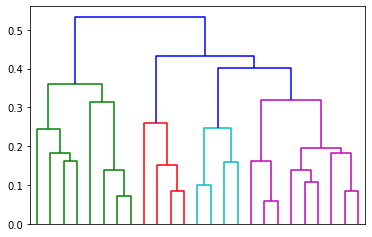

In [128]:

# View dendrogram for subset
Z_ = linkage(matrix_sample.todense()[:25], metric='cosine', method='complete')
_ = dendrogram(Z_, no_labels=True) # Plot dentrogram chart

### Get flat clusters from cluster hierarchy

In [18]:

clusters = fcluster(Z, 0.99, criterion='distance') # Create flat clusters by distance threshold

print_clusters(matrix_sample, clusters)

Cluster: 1 (1000 docs)
award, investigator, estimated, research, date, program, study, nsf, science, continuing



#### As it can be seen from the above with distance of 0.99 all the documents can be categorised in one cluster which can be ;abeled as research study award ,  however if the distance decarese at the distance of 0.5 this inludes more clusters

In [19]:

clusters = fcluster(Z, 0.5, criterion='distance') # Create flat clusters by distance threshold

print_clusters(matrix_sample, clusters)

Cluster: 1 (330 docs)
award, 0000099, study, nec, investigator, estimated, continuing, 30, date, project

Cluster: 2 (149 docs)
award, investigator, estimated, date, sciences, nsf, july, program, continuing, august

Cluster: 3 (76 docs)
study, award, project, estimated, investigator, date, program, research, nsf, 15

Cluster: 4 (33 docs)
new, award, research, science, investigator, div, program, 15, project, 30

Cluster: 5 (37 docs)
award, div, investigator, date, estimated, nsf, program, 30, continuing, july

Cluster: 6 (175 docs)
research, award, investigator, university, estimated, program, date, nsf, continuing, 30

Cluster: 7 (200 docs)
science, award, research, investigator, estimated, program, date, 15, div, nsf



### despite the fact that now there are differnt clusters they do not show any meaningful and conceptual difference 

In [21]:

clusters = fcluster(Z, 30, criterion='maxclust') # Create fix number of flat clusters
print_clusters(matrix_sample, clusters)

Cluster: 1 (96 docs)
study, award, 0000099, investigator, nec, estimated, continuing, july, date, project

Cluster: 2 (43 docs)
new, award, study, 0000099, investigator, continuing, nec, estimated, program, university

Cluster: 3 (13 docs)
july, august, award, 15, science, 0000099, investigator, new, nec, principal

Cluster: 4 (53 docs)
award, continuing, 0000099, investigator, nec, estimated, research, date, july, project

Cluster: 5 (5 docs)
continuing, othr, 0000, award, new, investigator, research, program, date, project

Cluster: 6 (66 docs)
award, 30, 0000099, nec, investigator, estimated, continuing, date, project, program

Cluster: 7 (54 docs)
award, 0000099, nec, investigator, research, estimated, 15, program, date, project

Cluster: 8 (37 docs)
august, award, estimated, investigator, date, research, nsf, july, div, new

Cluster: 9 (37 docs)
july, award, investigator, estimated, date, nsf, 30, program, nec, 0000099

Cluster: 10 (24 docs)
award, sciences, 15, investigator, prog

#### in the above, clustering is done with hierarchy, and with comparision with k-neighboring there is no conceptual difference for the two applied methodes

In [5]:
## Topic modeling demo
# Fast and simple tokenization
new_vectorizer = TfidfVectorizer()
word_tokenizer = new_vectorizer.build_tokenizer()
tokenized_text = [word_tokenizer(doc) for doc in document]



In [6]:
# Train LDA model
from gensim import corpora, models
dictionary = corpora.Dictionary(tokenized_text)
lda_corpus = [dictionary.doc2bow(text) for text in tokenized_text]
lda_model = models.LdaModel(lda_corpus, id2word=dictionary, num_topics=10)

In [12]:
for i, topic in lda_model.show_topics(num_words=10, formatted=False):
    print("Topic", i)
    for term, score in topic:
        print("%.4f\t%s" % (score,term))
    print()

Topic 0
0.0584	the
0.0530	of
0.0330	and
0.0276	to
0.0233	in
0.0127	is
0.0109	that
0.0096	will
0.0091	The
0.0080	on

Topic 1
0.0281	of
0.0221	Award
0.0163	Investigator
0.0161	the
0.0150	Program
0.0148	NSF
0.0146	Date
0.0146	Estimated
0.0096	MATHEMATICAL
0.0090	Principal

Topic 2
0.0478	the
0.0377	of
0.0320	and
0.0159	to
0.0148	in
0.0119	will
0.0118	Award
0.0100	Investigator
0.0084	Program
0.0082	NSF

Topic 3
0.0613	NC
0.0361	919
0.0331	Hill
0.0281	Carolina
0.0265	Chapel
0.0170	North
0.0114	27514
0.0106	unc
0.0090	962
0.0074	Bynum

Topic 4
0.0407	and
0.0326	the
0.0252	of
0.0187	to
0.0183	in
0.0129	Investigator
0.0126	will
0.0110	Award
0.0108	for
0.0102	students

Topic 5
0.0246	Rutgers
0.0234	New
0.0191	Brunswick
0.0169	Amherst
0.0155	Yale
0.0148	Plaza
0.0141	408
0.0127	III
0.0124	Cruz
0.0121	Santa

Topic 6
0.0420	of
0.0399	the
0.0318	and
0.0182	to
0.0155	in
0.0140	will
0.0112	be
0.0099	The
0.0098	Award
0.0090	for

Topic 7
0.0287	and
0.0223	of
0.0195	the
0.0192	to
0.0153	for
0.0115	Award


#### The above topics are not meaningful and includs many articles,auxilary verbs and so on, so we exlude these sore of words in the following coman lines  

In [13]:
tokenized_text[0]

['Mitochondrial',
 'DNA',
 'and',
 'Historical',
 'Demography',
 'Type',
 'Award',
 'NSF',
 'Org',
 'DEB',
 'Latest',
 'Amendment',
 'Date',
 'August',
 '1991',
 'File',
 'a9000006',
 'Award',
 'Number',
 '9000006',
 'Award',
 'Instr',
 'Continuing',
 'grant',
 'Prgm',
 'Manager',
 'Scott',
 'Collins',
 'DEB',
 'DIVISION',
 'OF',
 'ENVIRONMENTAL',
 'BIOLOGY',
 'BIO',
 'DIRECT',
 'FOR',
 'BIOLOGICAL',
 'SCIENCES',
 'Start',
 'Date',
 'June',
 '1990',
 'Expires',
 'November',
 '30',
 '1992',
 'Estimated',
 'Expected',
 'Total',
 'Amt',
 '179720',
 'Estimated',
 'Investigator',
 'Stephen',
 'Palumbi',
 'Principal',
 'Investigator',
 'current',
 'Sponsor',
 'of',
 'Hawaii',
 'Manoa',
 '2530',
 'Dole',
 'Street',
 'Honolulu',
 'HI',
 '968222225',
 '808',
 '956',
 '7800',
 'NSF',
 'Program',
 '1127',
 'SYSTEMATIC',
 'POPULATION',
 'BIOLO',
 'Fld',
 'Applictn',
 '0000099',
 'Other',
 'Applications',
 'NEC',
 '61',
 'Life',
 'Science',
 'Biological',
 'Program',
 'Ref',
 '9285',
 'Abstract',
 

In [16]:
# Inspect topics
for i, topic in lda_model.show_topics(num_words=50, formatted=False):
    print("Topic", i)
    printed_terms = 0
    for term, score in topic:
        if printed_terms >= 10:
            break
        elif term in "the of and to for in or The is be may an a with has at these This Date this This OF that are will which on by this as from can".split():
            continue
        printed_terms += 1
        print("%.4f\t%s" % (score,term))
    print()

Topic 0
0.0052	research
0.0052	Award
0.0040	project
0.0040	have
0.0035	NSF
0.0034	Investigator
0.0034	Estimated
0.0034	Program
0.0033	data
0.0032	models

Topic 1
0.0221	Award
0.0163	Investigator
0.0150	Program
0.0148	NSF
0.0146	Estimated
0.0096	MATHEMATICAL
0.0090	Principal
0.0087	current
0.0080	Abstract
0.0079	DMS

Topic 2
0.0118	Award
0.0100	Investigator
0.0084	Program
0.0082	NSF
0.0079	Estimated
0.0062	Principal
0.0062	current
0.0043	SCIENCES
0.0042	Abstract
0.0041	GEO

Topic 3
0.0613	NC
0.0361	919
0.0331	Hill
0.0281	Carolina
0.0265	Chapel
0.0170	North
0.0114	27514
0.0106	unc
0.0090	962
0.0074	Bynum

Topic 4
0.0129	Investigator
0.0110	Award
0.0102	students
0.0092	Principal
0.0092	current
0.0087	NSF
0.0084	Program
0.0081	research
0.0073	Estimated
0.0054	University

Topic 5
0.0246	Rutgers
0.0234	New
0.0191	Brunswick
0.0169	Amherst
0.0155	Yale
0.0148	Plaza
0.0141	408
0.0127	III
0.0124	Cruz
0.0121	Santa

Topic 6
0.0098	Award
0.0076	Investigator
0.0072	Program
0.0066	NSF
0.0065	Estimated

#### above the topics are much more meainingful than the first one but with removing some words which are repeated in all the topics, th extracted topics might make more sense, so some words such as 'program Program Award award Inverstigator inverstigator Estimated estimated University university Principal' will be excluded 

In [7]:
# Inspect topics
for i, topic in lda_model.show_topics(num_words=50, formatted=False):
    print("Topic", i)
    printed_terms = 0
    for term, score in topic:
        if printed_terms >= 10:
            break
        elif term in "the of and to for in or The project is be may an a with has at these This Date this This OF that are will which on by this as from can  program Program Award award research III FOR Co Prgm Abstract Investigator their it inverstigator Estimated estimated University university Principal ".split():
            continue
        printed_terms += 1
        print("%.4f\t%s" % (score,term))
    print()

Topic 0
0.0113	brain
0.0108	market
0.0104	Pittsburgh
0.0099	firms
0.0082	financial
0.0080	ECONOMIC
0.0078	Carnegie
0.0076	SOCIAL
0.0075	INT
0.0071	Mellon

Topic 1
0.0142	COMPUTER
0.0107	HPCC
0.0100	INFO
0.0099	CSE
0.0099	ENGINR
0.0094	SCIE
0.0089	systems
0.0083	RESEARCH
0.0083	data
0.0082	design

Topic 2
0.0046	NSF
0.0046	theory
0.0040	problems
0.0038	such
0.0037	DMS
0.0035	models
0.0033	systems
0.0032	have
0.0031	MATHEMATICAL
0.0029	methods

Topic 3
0.0049	species
0.0047	BIOLOGICAL
0.0046	NSF
0.0036	BIO
0.0034	have
0.0031	SCIENCES
0.0030	current
0.0028	BIOLOGY
0.0027	protein
0.0027	cell

Topic 4
0.0118	students
0.0069	current
0.0067	2003
0.0062	2002
0.0061	NSF
0.0059	science
0.0037	graduate
0.0036	undergraduate
0.0035	education
0.0033	engineering

Topic 5
0.0071	NSF
0.0070	2002
0.0055	current
0.0055	DIRECTORATE
0.0052	ENGINEERING
0.0045	ENG
0.0033	Number
0.0033	Manager
0.0032	Type
0.0032	Expected

Topic 6
0.0076	2002
0.0073	NSF
0.0067	2003
0.0059	GEO
0.0058	current
0.0058	climate
0.00

Topic 0 : market and finance
Topic 1: computer science
toipc 2: mathematical methods 
Topic 3 :Biology
Topic 4: students
Topic 5 : -----
Topic 6 : climate and GEO science
Topic 7 : social and econimic 
Topic 8 : material property
Topic 9: ------






    

### Q.2

In [8]:
## Train word vectors
# Make sure you also have cython installed to accelerate computation!
import gensim 

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Train word2vec model
vectors = gensim.models.Word2Vec(tokenized_text, size=100, window=5, min_count=5, workers=4)

2020-03-17 14:59:10,764 : INFO : collecting all words and their counts
2020-03-17 14:59:10,769 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-03-17 14:59:11,908 : INFO : PROGRESS: at sentence #10000, processed 2451772 words, keeping 92911 word types
2020-03-17 14:59:14,371 : INFO : PROGRESS: at sentence #20000, processed 4887339 words, keeping 147492 word types
2020-03-17 14:59:17,341 : INFO : PROGRESS: at sentence #30000, processed 7444097 words, keeping 195641 word types
2020-03-17 14:59:20,219 : INFO : PROGRESS: at sentence #40000, processed 10105855 words, keeping 241403 word types
2020-03-17 14:59:23,663 : INFO : PROGRESS: at sentence #50000, processed 12897489 words, keeping 285562 word types
2020-03-17 14:59:27,533 : INFO : PROGRESS: at sentence #60000, processed 15856587 words, keeping 328878 word types
2020-03-17 14:59:31,725 : INFO : PROGRESS: at sentence #70000, processed 18894877 words, keeping 371074 word types
2020-03-17 14:59:36,078 : INF

2020-03-17 15:03:51,430 : INFO : EPOCH 2 - PROGRESS: at 11.31% examples, 1473681 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:03:52,432 : INFO : EPOCH 2 - PROGRESS: at 16.57% examples, 1426702 words/s, in_qsize 6, out_qsize 1
2020-03-17 15:03:53,439 : INFO : EPOCH 2 - PROGRESS: at 21.64% examples, 1420707 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:03:54,445 : INFO : EPOCH 2 - PROGRESS: at 26.10% examples, 1372532 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:03:55,450 : INFO : EPOCH 2 - PROGRESS: at 30.30% examples, 1349919 words/s, in_qsize 8, out_qsize 0
2020-03-17 15:03:56,469 : INFO : EPOCH 2 - PROGRESS: at 34.72% examples, 1333724 words/s, in_qsize 5, out_qsize 2
2020-03-17 15:03:57,478 : INFO : EPOCH 2 - PROGRESS: at 38.84% examples, 1323950 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:03:58,482 : INFO : EPOCH 2 - PROGRESS: at 42.53% examples, 1313139 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:03:59,491 : INFO : EPOCH 2 - PROGRESS: at 46.83% examples, 1309242 words/s

2020-03-17 15:04:56,711 : INFO : EPOCH 4 - PROGRESS: at 97.43% examples, 1465623 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:04:57,432 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-03-17 15:04:57,433 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-03-17 15:04:57,436 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-03-17 15:04:57,437 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-03-17 15:04:57,438 : INFO : EPOCH - 4 : training on 39673924 raw words (31931616 effective words) took 21.9s, 1460647 effective words/s
2020-03-17 15:04:58,459 : INFO : EPOCH 5 - PROGRESS: at 5.00% examples, 1316750 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:04:59,461 : INFO : EPOCH 5 - PROGRESS: at 10.25% examples, 1323970 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:05:00,463 : INFO : EPOCH 5 - PROGRESS: at 15.50% examples, 1327349 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:05:01,467 : INFO : EPOCH 5

In [9]:
words = ['work', 'pattern', 'disease', 'percent', 'obvious']

In [11]:
print(vectors.wv.most_similar('work'))

[('research', 0.8633078336715698), ('study', 0.7425322532653809), ('project', 0.7225260734558105), ('effort', 0.6897100210189819), ('investigation', 0.6768474578857422), ('studies', 0.6582659482955933), ('investigations', 0.6531093716621399), ('proposal', 0.6226323246955872), ('workshop', 0.5873894691467285), ('experiment', 0.5842708945274353)]


### the selected words by the model except 'workshop' can be accepted to have same meaning for differnt situations.

In [12]:
print(vectors.wv.most_similar('pattern'))

[('patterns', 0.789414644241333), ('timing', 0.6502902507781982), ('mode', 0.6290395259857178), ('temporal', 0.6176190376281738), ('asymmetries', 0.6067225337028503), ('character', 0.5989295244216919), ('spontaneous', 0.5971380472183228), ('plasticity', 0.5966061353683472), ('appearance', 0.5956093072891235), ('shape', 0.5931124091148376)]


#### the selected words by the model are in good match with the 'pattern' anyhow 'spontanious' and 'plasticity' look to have differnt meaning but can be company the word 'pattern' 

------------------------------------

In [16]:
print(vectors.wv.most_similar('disease'))

[('diseases', 0.8456560373306274), ('AIDS', 0.7965543270111084), ('pathogens', 0.7953171730041504), ('infectious', 0.7715359926223755), ('cancer', 0.7692543268203735), ('infections', 0.765235424041748), ('pathogen', 0.7580274343490601), ('infection', 0.7465482354164124), ('pests', 0.7456491589546204), ('HIV', 0.7343069314956665)]


#### for word of 'disease', mostly name of the disease and words which are companying the disease have been recognized in good percision

--------------------------

In [14]:
print(vectors.wv.most_similar('percent'))

[('approximately', 0.7446668148040771), ('total', 0.7442915439605713), ('75', 0.7309954762458801), ('80', 0.7300984263420105), ('billion', 0.728751540184021), ('70', 0.7251726388931274), ('million', 0.7248543500900269), ('hectares', 0.7217522859573364), ('upwards', 0.7165240049362183), ('tons', 0.7069244384765625)]


#### For percent the selected words look to be less related, words such as 'tones' , 'hectares' and so on do not look to be a good match for percent 

-----------------------------

In [15]:
print(vectors.wv.most_similar('obvious'))

[('serious', 0.7301241159439087), ('apparent', 0.7041081190109253), ('surprising', 0.6860836148262024), ('questionable', 0.6812020540237427), ('inevitable', 0.6781014204025269), ('notable', 0.6759514808654785), ('however', 0.6751658320426941), ('compelling', 0.6696269512176514), ('problematic', 0.6669461727142334), ('immense', 0.6619775295257568)]


#### not very good for 'obvious' 

--------------------------------

#### Change some parameters in the model to improve the result


In [17]:
## Train word vectors
# Make sure you also have cython installed to accelerate computation!
import gensim 

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Train word2vec model
vectors = gensim.models.Word2Vec(tokenized_text, size=200, window=5, min_count=10, workers=4)

2020-03-17 15:28:07,015 : INFO : collecting all words and their counts
2020-03-17 15:28:07,016 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-03-17 15:28:07,444 : INFO : PROGRESS: at sentence #10000, processed 2451772 words, keeping 92911 word types
2020-03-17 15:28:07,844 : INFO : PROGRESS: at sentence #20000, processed 4887339 words, keeping 147492 word types
2020-03-17 15:28:08,289 : INFO : PROGRESS: at sentence #30000, processed 7444097 words, keeping 195641 word types
2020-03-17 15:28:08,735 : INFO : PROGRESS: at sentence #40000, processed 10105855 words, keeping 241403 word types
2020-03-17 15:28:09,210 : INFO : PROGRESS: at sentence #50000, processed 12897489 words, keeping 285562 word types
2020-03-17 15:28:09,711 : INFO : PROGRESS: at sentence #60000, processed 15856587 words, keeping 328878 word types
2020-03-17 15:28:10,246 : INFO : PROGRESS: at sentence #70000, processed 18894877 words, keeping 371074 word types
2020-03-17 15:28:10,788 : INF

2020-03-17 15:29:09,887 : INFO : EPOCH 2 - PROGRESS: at 64.73% examples, 1103357 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:29:10,903 : INFO : EPOCH 2 - PROGRESS: at 67.98% examples, 1101182 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:29:11,906 : INFO : EPOCH 2 - PROGRESS: at 71.13% examples, 1099507 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:29:12,910 : INFO : EPOCH 2 - PROGRESS: at 74.16% examples, 1098069 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:29:13,911 : INFO : EPOCH 2 - PROGRESS: at 77.25% examples, 1098362 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:29:14,919 : INFO : EPOCH 2 - PROGRESS: at 80.48% examples, 1100263 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:29:15,919 : INFO : EPOCH 2 - PROGRESS: at 84.48% examples, 1115656 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:29:16,921 : INFO : EPOCH 2 - PROGRESS: at 88.56% examples, 1132399 words/s, in_qsize 6, out_qsize 1
2020-03-17 15:29:17,925 : INFO : EPOCH 2 - PROGRESS: at 92.21% examples, 1140762 words/s

2020-03-17 15:30:15,523 : INFO : EPOCH 4 - PROGRESS: at 93.64% examples, 1118730 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:30:16,523 : INFO : EPOCH 4 - PROGRESS: at 96.30% examples, 1116087 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:30:17,526 : INFO : EPOCH 4 - PROGRESS: at 99.12% examples, 1114069 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:30:17,796 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-03-17 15:30:17,800 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-03-17 15:30:17,803 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-03-17 15:30:17,812 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-03-17 15:30:17,812 : INFO : EPOCH - 4 : training on 39673924 raw words (31676254 effective words) took 28.4s, 1113971 effective words/s
2020-03-17 15:30:18,827 : INFO : EPOCH 5 - PROGRESS: at 4.10% examples, 1086865 words/s, in_qsize 7, out_qsize 0
2020-03-17 15:30:19,829 : INFO : EPOCH 5

In [18]:
print(vectors.wv.most_similar('work'))

2020-03-17 15:42:05,636 : INFO : precomputing L2-norms of word weight vectors


[('research', 0.7938613891601562), ('project', 0.7012810707092285), ('study', 0.6698108911514282), ('investigation', 0.6117867231369019), ('effort', 0.6066216230392456), ('investigations', 0.5943707227706909), ('studies', 0.5817960500717163), ('proposal', 0.5413938164710999), ('program', 0.5220478177070618), ('workshop', 0.5200454592704773)]


#### Almost the same selection

In [19]:
print(vectors.wv.most_similar('pattern'))

[('patterns', 0.7208275198936462), ('shape', 0.5189458727836609), ('appearance', 0.5178953409194946), ('character', 0.508438229560852), ('temporal', 0.5074548721313477), ('patterning', 0.5058163404464722), ('limb', 0.49612706899642944), ('organ', 0.49492573738098145), ('trajectory', 0.49353599548339844), ('phenomenon', 0.4930301606655121)]


#### better choices, however, word like patterns does not give any new information 

----------------------------------

In [20]:
print(vectors.wv.most_similar('disease'))

[('diseases', 0.8047645092010498), ('AIDS', 0.7582086324691772), ('cancer', 0.7344720959663391), ('infectious', 0.7309648990631104), ('infections', 0.7062660455703735), ('pathogens', 0.7003945112228394), ('HIV', 0.6976037621498108), ('pathogen', 0.6915576457977295), ('Alzheimer', 0.6895266771316528), ('pests', 0.6783614158630371)]


#### Almost same as the previous model

-------------------------------------

In [21]:
print(vectors.wv.most_similar('percent'))

[('approximately', 0.71341872215271), ('75', 0.7007619142532349), ('80', 0.6952838897705078), ('kg', 0.686231255531311), ('total', 0.6836721897125244), ('seventy', 0.6747063398361206), ('upwards', 0.6739497184753418), ('billion', 0.6682729721069336), ('70', 0.666856586933136), ('roughly', 0.6581007838249207)]


#### not good choices as the previous set-up

*******************************************************

In [22]:
print(vectors.wv.most_similar('obvious'))

[('apparent', 0.6536035537719727), ('serious', 0.618026614189148), ('compelling', 0.6130911111831665), ('notable', 0.6118664145469666), ('clear', 0.605475127696991), ('inevitable', 0.6031302213668823), ('obviously', 0.6028131246566772), ('striking', 0.6021876335144043), ('surprising', 0.5977765321731567), ('pervasive', 0.587814211845398)]


#### some better match such as 'surprising' , 'striking' ,.... so much better job here 

--------------------------------

#### texts from the awards_2002

In [23]:
document_2002 = []
fname_ = []
for root,_,files in os.walk("abstracts/awards_2002"):
    for fname in files:
            if fname[-4:] == ".txt":
                fnames = os.path.join(root, fname)
                fname_.append(fnames)
for fn in fname_:                
    with open(fn,  "rt", encoding="utf-8") as f:
        try:
            for line in f:
                if "Abstract    :" in line:
                    break
                # get abstract as a single string
        #                             documents = [line.strip() for line in f.readlines()]
#                 print(line)
                documents = ' '.join([line[:-1].strip() for line in f])
                documents = re.sub(' +', ' ', documents)  # remove double spaces
                document_2002.append(documents)
        except:
            continue
        




In [24]:
## Topic modeling demo
# Fast and simple tokenization
new_vectorizer_2002 = TfidfVectorizer()
word_tokenizer_2002 = new_vectorizer_2002.build_tokenizer()
tokenized_text_2002 = [word_tokenizer(doc) for doc in document_2002]

In [26]:
## Train word vectors
# Make sure you also have cython installed to accelerate computation!
import gensim 

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Train word2vec model
vectors = gensim.models.Word2Vec(tokenized_text_2002, size=200, window=5, min_count=10, workers=4)

2020-03-17 16:05:29,711 : INFO : collecting all words and their counts
2020-03-17 16:05:29,712 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-03-17 16:05:30,349 : INFO : collected 110863 word types from a corpus of 3585650 raw words and 9918 sentences
2020-03-17 16:05:30,350 : INFO : Loading a fresh vocabulary
2020-03-17 16:07:49,787 : INFO : effective_min_count=10 retains 17012 unique words (15% of original 110863, drops 93851)
2020-03-17 16:07:49,795 : INFO : effective_min_count=10 leaves 3402739 word corpus (94% of original 3585650, drops 182911)
2020-03-17 16:07:49,867 : INFO : deleting the raw counts dictionary of 110863 items
2020-03-17 16:07:49,871 : INFO : sample=0.001 downsamples 53 most-common words
2020-03-17 16:07:49,871 : INFO : downsampling leaves estimated 2766979 word corpus (81.3% of prior 3402739)
2020-03-17 16:07:49,912 : INFO : estimated required memory for 17012 words and 200 dimensions: 35725200 bytes
2020-03-17 16:07:49,913 : INFO

In [27]:
print(vectors.wv.most_similar('work'))

2020-03-17 16:10:05,185 : INFO : precomputing L2-norms of word weight vectors


[('research', 0.8341087102890015), ('study', 0.7794250249862671), ('project', 0.7389976978302002), ('investigation', 0.7211897373199463), ('effort', 0.7016195058822632), ('proposal', 0.6869873404502869), ('investigations', 0.6405994892120361), ('approach', 0.6387003660202026), ('studies', 0.6323292255401611), ('program', 0.6026599407196045)]


In [28]:
print(vectors.wv.most_similar('pattern'))

[('localization', 0.8014732599258423), ('muscle', 0.7841091156005859), ('mRNA', 0.7749961614608765), ('function', 0.7695099115371704), ('variables', 0.7646422982215881), ('channel', 0.7641276121139526), ('curve', 0.764004111289978), ('mechanism', 0.7624053359031677), ('signals', 0.7616889476776123), ('instability', 0.7616028785705566)]


In [29]:
print(vectors.wv.most_similar('disease'))

[('insect', 0.8870453834533691), ('pathogens', 0.88503098487854), ('plants', 0.8498578071594238), ('hormone', 0.8490990400314331), ('reproductive', 0.8456018567085266), ('fungi', 0.8448106050491333), ('sexual', 0.8438753485679626), ('pathogen', 0.8322082757949829), ('resistance', 0.8302956819534302), ('trait', 0.8249731063842773)]


In [30]:
print(vectors.wv.most_similar('percent'))

[('70', 0.8721003532409668), ('approximately', 0.8685452938079834), ('80', 0.8582992553710938), ('90', 0.8382930159568787), ('hours', 0.8227778077125549), ('000', 0.8223231434822083), ('50', 0.8207800984382629), ('40', 0.8050470352172852), ('yr', 0.8024305105209351), ('square', 0.7994811534881592)]


In [31]:
print(vectors.wv.most_similar('obvious'))

[('ignored', 0.8148432970046997), ('hitherto', 0.8147283792495728), ('serious', 0.810940146446228), ('argued', 0.7716206908226013), ('indeed', 0.7695738077163696), ('certainly', 0.75959312915802), ('surprising', 0.7553567886352539), ('widespread', 0.7388790845870972), ('attracted', 0.737126350402832), ('attempted', 0.7368018627166748)]


In [36]:
dic_whole = {'work': ['research', 'project', 'study','investigation', 'effort','investigations','studies','proposal', 'program', 'approch'],
             'pattern':['patterns','shape', 'appearance', 'character', 'temporal', 'patterning','limb', 'organ', 'trajectory', 'phenomenon'], 
             'disease':['diseases','AIDS','cancer','infectious', 'infections', 'pathogens', 'HIV', 'pathogen','Alzheimer', 'pests'], 
                         'percent':['approximately', '75', '80',  'kg', 'total', 'seventy', 'upwards', 'billion', '70', 'roughly'], 
             'obvious':['apparent','serious','compelling', 'notable', 'clear','inevitable', 'obviously', 'striking', 'surprising', 'pervasive'] }



dic_2002 = {'work': ['research', 'project', 'study','investigation', 'effort','proposal','studies','investigations', 'program', 'workshop'],
             'pattern':['localization','muscle', 'mRNA', 'function', 'variables', 'channel', 'curve', 'mechanism', 'signals', 'instability'], 
             'disease':['insect', 'pathogens', 'plants', 'hormone', 'reproductive', 'fungi','sexual', 'pathogen', 'resistance', 'trait'], 
                         'percent':['70','approximately', '80', '90', 'hours', '000', '50',  '40', 'yr', 'square'], 
             'obvious':['ignored', 'hitherto', 'serious', 'argued', 'indeed', 'certainly', 'surprising', 'widespread', 'attracted','attempted']}



In [39]:
import pandas as pd 
pd.DataFrame.from_dict(dic_whole)

,work,pattern,disease,percent,obvious
0,research,patterns,diseases,approximately,apparent
1,project,shape,AIDS,75,serious
2,study,appearance,cancer,80,compelling
3,investigation,character,infectious,kg,notable
4,effort,temporal,infections,total,clear
5,investigations,patterning,pathogens,seventy,inevitable
6,studies,limb,HIV,upwards,obviously
7,proposal,organ,pathogen,billion,striking
8,program,trajectory,Alzheimer,70,surprising
9,approch,phenomenon,pests,roughly,pervasive


In [40]:
pd.DataFrame.from_dict(dic_2002)

,work,pattern,disease,percent,obvious
0,research,localization,insect,70,ignored
1,project,muscle,pathogens,approximately,hitherto
2,study,mRNA,plants,80,serious
3,investigation,function,hormone,90,argued
4,effort,variables,reproductive,hours,indeed
5,proposal,channel,fungi,000,certainly
6,studies,curve,sexual,50,surprising
7,investigations,mechanism,pathogen,40,widespread
8,program,signals,resistance,yr,attracted
9,workshop,instability,trait,square,attempted


#### with comparison of two data frme including the selcte words, it can be seen that the words from builded model on the whole data set are more accurate 

### Q.2 ELMo

In [2]:
import tensorflow_hub as hub
import tensorflow as tf

# Load ELMo model (takes a little while)
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

def elmo_vectors(sents):
    embeddings = elmo(sents, signature="default", as_dict=True)["elmo"]
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        return sess.run(embeddings)
        #sess.run(tf.tables_initializer())
        # return average of ELMo features as sentence vector
        #return sess.run(tf.reduce_mean(embeddings,1))
        
        

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
targets = ['crane', 'date', 'right']

In [9]:

sents = """ That bird is a crane.
They had to use a crane to lift the object.
She had to crane her neck to see the movie.
Her favorite fruit to eat is a date.
Joe took Alexandria out on a date.
Not to date myself, but I remember listening to radio shows as a kid.
What is your date of birth?
You were right.
Make a right turn at the light.
Access to clean water is a basic human right.
""".split('\n')
def elmo_vecs(target):
    elmo_vecs = elmo_vectors(sents)
    word_vecs = []
    for i, sent in enumerate(sents):
        word_vecs.append(elmo_vecs[i][sent.split().index(target)])
        print("Sentence:", sent)
        print("Vector for '%s':" % target, word_vecs[-1])
        print()
    print("Word vector size:", word_vecs[0].shape)

AttributeError: Tensor.graph is meaningless when eager execution is enabled.

In [1]:
from sklearn.metrics.pairwise import cosine_similarity

vec_size = word_vecs[0].shape[0]
print("Similarities between '%s' vector in sentences:" % target)
for i in range(1, len(sents)):
    print("Sent 0-%d:" % i, cosine_similarity(word_vecs[0].reshape((1,vec_size)), 
                                              word_vecs[i].reshape((1,vec_size)))[0][0])

NameError: name 'word_vecs' is not defined